In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kirovsk ru
carnarvon au
isangel vu
yellowknife ca
betare oya cm
nizhneyansk ru
illoqqortoormiut gl
taolanaro mg
qaanaaq gl
mucuri br
port elizabeth za
caravelas br
namatanai pg
faya td
vaini to
cotonou bj
rikitea pf
attawapiskat ca
punta arenas cl
tuktoyaktuk ca
torbay ca
butaritari ki
berbera so
chokurdakh ru
pampa us
hobart au
kalaleh ir
east london za
perevolotskiy ru
port-gentil ga
busselton au
tocopilla cl
attawapiskat ca
ambon id
bluff nz
tuktoyaktuk ca
thinadhoo mv
port alfred za
ushuaia ar
varzelandia br
egvekinot ru
port elizabeth za
olafsvik is
tuktoyaktuk ca
illoqqortoormiut gl
amderma ru
hilo us
cape town za
tingo maria pe
kruisfontein za
the pas ca
porto velho br
kodiak us
vaini to
bacabal br
kavaratti in
lakes entrance au
karangampel id
swan hill au
illoqqortoormiut gl
jamestown sh
luwuk id
rikitea pf
lompoc us
katsuura jp
albany au
bolungarvik is
hermanus za
puerto ayora ec
chifeng cn
mar del plata ar
pisco pe
barrow us
upernavik gl
mao td
isangel vu
seoul kr
taolanaro m

ushuaia ar
port elizabeth za
jamestown sh
barentsburg sj
rikitea pf
ponta do sol cv
butaritari ki
kibaya tz
punta arenas cl
tautira pf
qaanaaq gl
busselton au
puerto ayora ec
paamiut gl
ambagarh chauki in
jamestown sh
gat ly
george town ky
acapulco mx
bunda tz
aklavik ca
sapele ng
rikitea pf
tucuma br
butaritari ki
launceston au
qaanaaq gl
sobolevo ru
kapaa us
kerman ir
bathsheba bb
vaini to
nizhneyansk ru
albany au
punta arenas cl
ostrovnoy ru
punta arenas cl
pisco pe
taolanaro mg
vaini to
rikitea pf
ushuaia ar
punta arenas cl
punta arenas cl
ardabil ir
albany au
dikson ru
ushuaia ar
busselton au
busselton au
georgetown us
punta arenas cl
deer lake ca
ushuaia ar
busselton au
sangar ru
luderitz na
souillac mu
puerto ayora ec
ushuaia ar
kodiak us
busselton au
vao nc
taolanaro mg
one hundred mile house ca
beyneu kz
aksarka ru
cape town za
jamestown sh
torbay ca
isangel vu
garden city us
port hedland au
jijiga et
punta arenas cl
trinidad us
vestmannaeyjar is
san rafael ar
kiunga pg
luderi

sungairaya id
new norfolk au
muros es
port alfred za
qaanaaq gl
victoria sc
butaritari ki
umm lajj sa
hilo us
baykit ru
mys shmidta ru
kruisfontein za
nortelandia br
taolanaro mg
hopeman gb
mys shmidta ru
bethel us
podosinovets ru
soligalich ru
hasaki jp
alotau pg
tuktoyaktuk ca
amderma ru
mahebourg mu
paamiut gl
alice springs au
bredasdorp za
saskylakh ru
rikitea pf
sayyan ye
busselton au
georgetown sh
great yarmouth gb


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 24 of Set 25 | kirovsk
Processing Record 25 of Set 25 | carnarvon
Processing Record 26 of Set 25 | isangel
Processing Record 27 of Set 25 | yellowknife
Processing Record 28 of Set 25 | betare oya
Processing Record 29 of Set 25 | nizhneyansk
City not found. Skipping...
Processing Record 30 of Set 25 | illoqqortoormiut
City not found. Skipping...
Processing Record 31 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 32 of Set 25 | qaanaaq
Processing Record 33 of Set 25 | mucuri
Processing Record 34 of Set 25 | port elizabeth
Processing Record 35 of Set 25 | caravelas
Processing Record 36 of Set 25 | namatanai
Processing Record 37 of Set 25 | faya
Processing Record 38 of Set 25 | vaini
Processing Record 39 of Set 25 | cotonou
Processing Record 40 of Set 25 | rikitea
Processing Record 41 of Set 25 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 25 | punta arenas
Processing Record 43 of Set 25 | tuktoyaktuk
Processing Record 44 of S

Processing Record 34 of Set 28 | saskylakh
Processing Record 35 of Set 28 | chipinge
Processing Record 36 of Set 28 | ratnagiri
Processing Record 37 of Set 28 | pangnirtung
Processing Record 38 of Set 28 | vaitape
Processing Record 39 of Set 28 | chuy
Processing Record 40 of Set 28 | pahrump
Processing Record 41 of Set 28 | karakendzha
City not found. Skipping...
Processing Record 42 of Set 28 | yenagoa
Processing Record 43 of Set 28 | hithadhoo
Processing Record 44 of Set 28 | clyde river
Processing Record 45 of Set 28 | ayaviri
Processing Record 46 of Set 28 | pine bluff
Processing Record 47 of Set 28 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 28 | lolua
City not found. Skipping...
Processing Record 49 of Set 28 | krasnoselkup
Processing Record 50 of Set 28 | braniewo
Processing Record 1 of Set 29 | baykit
Processing Record 2 of Set 29 | leningradskiy
Processing Record 3 of Set 29 | smithers
Processing Record 4 of Set 29 | hamilton
Processing Record 5 of 

Processing Record 20 of Set 32 | isoka
Processing Record 21 of Set 32 | toftir
City not found. Skipping...
Processing Record 22 of Set 32 | broome
Processing Record 23 of Set 32 | lisakovsk
Processing Record 24 of Set 32 | cuamba
Processing Record 25 of Set 32 | lorengau
Processing Record 26 of Set 32 | pringsewu
Processing Record 27 of Set 32 | alvorada
Processing Record 28 of Set 32 | flin flon
Processing Record 29 of Set 32 | preobrazheniye
Processing Record 30 of Set 32 | newport
Processing Record 31 of Set 32 | dawlatabad
Processing Record 32 of Set 32 | kokologo
Processing Record 33 of Set 32 | mandal
Processing Record 34 of Set 32 | tessalit
Processing Record 35 of Set 32 | makakilo city
Processing Record 36 of Set 32 | khasan
Processing Record 37 of Set 32 | narsaq
Processing Record 38 of Set 32 | ponta delgada
Processing Record 39 of Set 32 | ilulissat
Processing Record 40 of Set 32 | aranos
Processing Record 41 of Set 32 | lively
Processing Record 42 of Set 32 | kangalassy
Pr

Processing Record 9 of Set 36 | kropotkin
Processing Record 10 of Set 36 | la ronge
Processing Record 11 of Set 36 | sainte-adele
Processing Record 12 of Set 36 | redcar
Processing Record 13 of Set 36 | kathu
Processing Record 14 of Set 36 | la asuncion
Processing Record 15 of Set 36 | kulhudhuffushi
Processing Record 16 of Set 36 | andarab
City not found. Skipping...
Processing Record 17 of Set 36 | denpasar
Processing Record 18 of Set 36 | nizhniy odes
Processing Record 19 of Set 36 | meyungs
City not found. Skipping...
Processing Record 20 of Set 36 | vanavara
Processing Record 21 of Set 36 | keetmanshoop
Processing Record 22 of Set 36 | ayan
Processing Record 23 of Set 36 | gurskoye
City not found. Skipping...
Processing Record 24 of Set 36 | yumen
Processing Record 25 of Set 36 | prince rupert
Processing Record 26 of Set 36 | hargeysa
Processing Record 27 of Set 36 | tongsa
City not found. Skipping...
Processing Record 28 of Set 36 | tateyama
Processing Record 29 of Set 36 | vung 

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kirovsk,48.6375,38.6428,57.24,52,99,21.21,UA,2022-04-01 16:33:46
1,Carnarvon,-24.8667,113.6333,75.27,94,100,4.61,AU,2022-04-01 16:33:47
2,Isangel,-19.5500,169.2667,79.84,88,70,6.15,VU,2022-04-01 16:33:47
3,Yellowknife,62.4560,-114.3525,-8.59,74,40,10.36,CA,2022-04-01 16:33:48
4,Betare Oya,5.6000,14.0833,86.92,30,60,3.38,CM,2022-04-01 16:33:48
5,Qaanaaq,77.4840,-69.3632,19.99,93,100,5.95,GL,2022-04-01 16:33:49
6,Mucuri,-18.0864,-39.5508,83.34,66,7,10.20,BR,2022-04-01 16:33:49
7,Port Elizabeth,-33.9180,25.5701,68.09,76,0,12.66,ZA,2022-04-01 16:33:21
8,Caravelas,-17.7125,-39.2481,84.97,61,10,8.39,BR,2022-04-01 16:33:50
9,Namatanai,-3.6667,152.4333,79.23,83,100,5.84,PG,2022-04-01 16:33:50


In [47]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kirovsk,UA,2022-04-01 16:33:46,48.6375,38.6428,57.24,52,99,21.21
1,Carnarvon,AU,2022-04-01 16:33:47,-24.8667,113.6333,75.27,94,100,4.61
2,Isangel,VU,2022-04-01 16:33:47,-19.5500,169.2667,79.84,88,70,6.15
3,Yellowknife,CA,2022-04-01 16:33:48,62.4560,-114.3525,-8.59,74,40,10.36
4,Betare Oya,CM,2022-04-01 16:33:48,5.6000,14.0833,86.92,30,60,3.38
5,Qaanaaq,GL,2022-04-01 16:33:49,77.4840,-69.3632,19.99,93,100,5.95
6,Mucuri,BR,2022-04-01 16:33:49,-18.0864,-39.5508,83.34,66,7,10.20
7,Port Elizabeth,ZA,2022-04-01 16:33:21,-33.9180,25.5701,68.09,76,0,12.66
8,Caravelas,BR,2022-04-01 16:33:50,-17.7125,-39.2481,84.97,61,10,8.39
9,Namatanai,PG,2022-04-01 16:33:50,-3.6667,152.4333,79.23,83,100,5.84


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

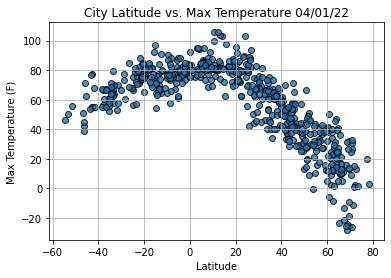

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

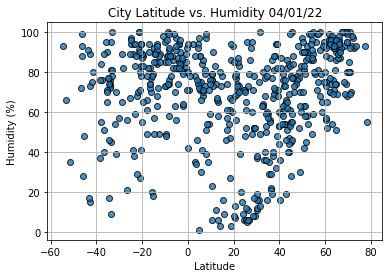

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

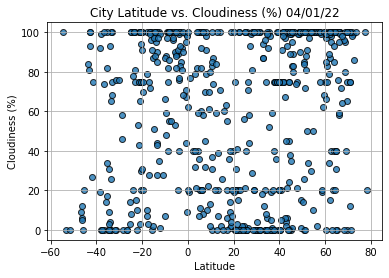

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

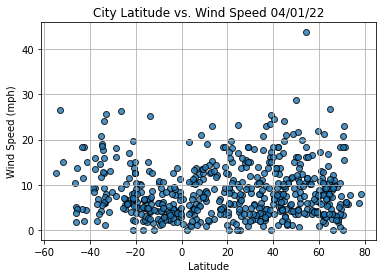

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()